<a href="https://colab.research.google.com/github/Agil0509/Deep-Learning/blob/main/Animals_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"aqilismayilzade","key":"7ac7d6f00d69dcab292ddf7cade60098"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d sanadalali/animal-categories-90-masters-of-survival

Dataset URL: https://www.kaggle.com/datasets/sanadalali/animal-categories-90-masters-of-survival
License(s): apache-2.0


In [ ]:
!unzip "/content/animal-categories-90-masters-of-survival.zip"

Streaming output truncated to the last 5000 lines.
  inflating: animals/animals/animals/bison/74dc1dd32a.jpg  
  inflating: animals/animals/animals/bison/75ab166a7d.jpg  
  inflating: animals/animals/animals/bison/79e1610d01.jpg  
  inflating: animals/animals/animals/bison/7ba5eee91f.jpg  
  inflating: animals/animals/animals/bison/7d214aab4b.jpg  
  inflating: animals/animals/animals/bison/7f2ef9ab03.jpg  
  inflating: animals/animals/animals/bison/82ec723a4f.jpg  
  inflating: animals/animals/animals/bison/85e145af6c.jpg  
  inflating: animals/animals/animals/bison/862e2c6379.jpg  
  inflating: animals/animals/animals/bison/87a5c700ad.jpg  
  inflating: animals/animals/animals/bison/88b723ce90.jpg  
  inflating: animals/animals/animals/bison/8c3af742c3.jpg  
  inflating: animals/animals/animals/bison/8e34044b98.jpg  
  inflating: animals/animals/animals/bison/8e6adbdc40.jpg  
  inflating: animals/animals/animals/bison/8fce80d5ba.jpg  
  inflating: animals/animals/animals/bison/961a89

In [ ]:
!ls /content/animals/animals/animals

antelope     crab	goose	      leopard	 parrot		 sheep
badger	     crow	gorilla       lion	 pelecaniformes  snake
bat	     deer	grasshopper   lizard	 penguin	 sparrow
bear	     dog	hamster       lobster	 pig		 squid
bee	     dolphin	hare	      mosquito	 pigeon		 squirrel
beetle	     donkey	hedgehog      moth	 porcupine	 starfish
bison	     dragonfly	hippopotamus  mouse	 possum		 swan
boar	     duck	hornbill      octopus	 raccoon	 tiger
butterfly    eagle	horse	      okapi	 rat		 turkey
cat	     elephant	hummingbird   orangutan  reindeer	 turtle
caterpillar  flamingo	hyena	      otter	 rhinoceros	 whale
chimpanzee   fly	jellyfish     owl	 sandpiper	 wolf
cockroach    fox	kangaroo      ox	 seahorse	 wombat
cow	     goat	koala	      oyster	 seal		 woodpecker
coyote	     goldfish	ladybugs      panda	 shark		 zebra


In [ ]:
import os

images_classes  = os.listdir('/content/animals/animals/animals')
len(images_classes)

90

In [ ]:
numbers = {}
for animal in images_classes:
    length = len(os.listdir(f'/content/animals/animals/animals/{animal}'))
    numbers[animal] = length

In [ ]:
numbers

{'sparrow': 60,
 'flamingo': 60,
 'otter': 60,
 'okapi': 60,
 'hornbill': 60,
 'panda': 60,
 'bear': 60,
 'grasshopper': 60,
 'hippopotamus': 60,
 'deer': 60,
 'raccoon': 60,
 'reindeer': 60,
 'snake': 60,
 'turtle': 60,
 'pigeon': 60,
 'dragonfly': 60,
 'caterpillar': 60,
 'starfish': 60,
 'porcupine': 60,
 'shark': 60,
 'goose': 60,
 'donkey': 60,
 'butterfly': 60,
 'boar': 60,
 'seahorse': 60,
 'jellyfish': 60,
 'antelope': 60,
 'woodpecker': 60,
 'oyster': 60,
 'penguin': 60,
 'sheep': 60,
 'dolphin': 60,
 'duck': 60,
 'hare': 60,
 'rat': 60,
 'lizard': 60,
 'moth': 60,
 'zebra': 60,
 'mouse': 60,
 'crow': 60,
 'wolf': 60,
 'tiger': 60,
 'cockroach': 60,
 'elephant': 60,
 'gorilla': 60,
 'wombat': 60,
 'mosquito': 60,
 'goldfish': 60,
 'coyote': 60,
 'octopus': 60,
 'pelecaniformes': 60,
 'ox': 60,
 'possum': 60,
 'squid': 60,
 'whale': 60,
 'owl': 60,
 'hummingbird': 60,
 'eagle': 60,
 'hedgehog': 60,
 'bat': 60,
 'horse': 60,
 'bee': 60,
 'seal': 60,
 'parrot': 60,
 'hamster': 60

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import pathlib

def view_random_image(target_dir,classes):
    target_class= random.choice(classes)
    target_folder = pathlib.Path(target_dir) / target_class
    random_image = random.choice(os.listdir(target_folder))
    random_iamge_path = target_folder/ random_image
    img = mpimg.imread(random_iamge_path)
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')
    print(f'image shape: {img.shape}')

image shape: (854, 653, 3)


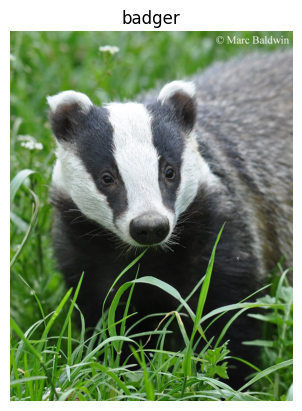

In [ ]:
view_random_image(target_dir='/content/animals/animals/animals', classes = images_classes)

In [ ]:
import tensorflow as tf

IMG_SIZE = (224,224)

data_dir = '/content/animals/animals/animals'

train_data = tf.keras.utils.image_dataset_from_directory(directory = data_dir,
                                                         validation_split = 0.2,
                                                         subset = 'training',
                                                         seed = 42,
                                                         image_size = IMG_SIZE,
                                                         batch_size = 32,
                                                         label_mode = 'categorical')

test_data = tf.keras.utils.image_dataset_from_directory(directory = data_dir,
                                                   validation_split = 0.2,
                                                    seed = 42,
                                                   subset = 'validation',
                                                   image_size = IMG_SIZE,
                                                   batch_size = 32,
                                                   label_mode = 'categorical')

Found 5400 files belonging to 90 classes.
Using 4320 files for training.
Found 5400 files belonging to 90 classes.
Using 1080 files for validation.


In [ ]:
train_data.class_names

['antelope',
 'badger',
 'bat',
 'bear',
 'bee',
 'beetle',
 'bison',
 'boar',
 'butterfly',
 'cat',
 'caterpillar',
 'chimpanzee',
 'cockroach',
 'cow',
 'coyote',
 'crab',
 'crow',
 'deer',
 'dog',
 'dolphin',
 'donkey',
 'dragonfly',
 'duck',
 'eagle',
 'elephant',
 'flamingo',
 'fly',
 'fox',
 'goat',
 'goldfish',
 'goose',
 'gorilla',
 'grasshopper',
 'hamster',
 'hare',
 'hedgehog',
 'hippopotamus',
 'hornbill',
 'horse',
 'hummingbird',
 'hyena',
 'jellyfish',
 'kangaroo',
 'koala',
 'ladybugs',
 'leopard',
 'lion',
 'lizard',
 'lobster',
 'mosquito',
 'moth',
 'mouse',
 'octopus',
 'okapi',
 'orangutan',
 'otter',
 'owl',
 'ox',
 'oyster',
 'panda',
 'parrot',
 'pelecaniformes',
 'penguin',
 'pig',
 'pigeon',
 'porcupine',
 'possum',
 'raccoon',
 'rat',
 'reindeer',
 'rhinoceros',
 'sandpiper',
 'seahorse',
 'seal',
 'shark',
 'sheep',
 'snake',
 'sparrow',
 'squid',
 'squirrel',
 'starfish',
 'swan',
 'tiger',
 'turkey',
 'turtle',
 'whale',
 'wolf',
 'wombat',
 'woodpecker',


In [ ]:
for i in train_data.take(1):
    print(i[0].shape)

(32, 224, 224, 3)


In [ ]:
len(train_data)

135

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (224,224,3)),
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.25),
    layers.RandomZoom(0.25),
    layers.RandomWidth(0.25),
    layers.RandomHeight(0.25)
])

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape = [224,224,3]),
    data_augmentation,
    tf.keras.layers.Rescaling(1/255.),
    tf.keras.layers.Conv2D(filters = 64, kernel_size = (7,7),padding = 'same',
                           strides = (2,2),activation = 'relu', kernel_initializer = 'he_normal'),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Conv2D(filters = 128, kernel_size = (5,5),padding = 'valid',strides=(1,1),
                           activation = 'relu', kernel_initializer = 'he_normal'),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Conv2D(filters = 256, kernel_size = (3,3),padding = 'valid',strides=(1,1),
                           activation = 'relu', kernel_initializer = 'he_normal'),
    tf.keras.layers.MaxPool2D(pool_size = (2,2)),
    tf.keras.layers.Conv2D(filters = 256, kernel_size = (3,3),padding = 'valid',strides=(1,1),
                           activation = 'relu', kernel_initializer = 'he_normal'),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(units = 256, activation = 'relu',kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(rate = 0.5),
    tf.keras.layers.Dense(units = 128, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(rate = 0.5),
    tf.keras.layers.Dense(units = 90, activation = 'softmax', kernel_initializer = 'glorot_normal')
])

In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy'])

model.fit(train_data, epochs = 10, validation_data=test_data)

Epoch 1/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 106s 738ms/step - accuracy: 0.0146 - loss: 4.5737 - val_accuracy: 0.0130 - val_loss: 4.4992
Epoch 2/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 117s 575ms/step - accuracy: 0.0124 - loss: 4.4881 - val_accuracy: 0.0148 - val_loss: 4.4372
Epoch 3/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 66s 489ms/step - accuracy: 0.0186 - loss: 4.4348 - val_accuracy: 0.0241 - val_loss: 4.3730
Epoch 4/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 58s 429ms/step - accuracy: 0.0284 - loss: 4.3679 - val_accuracy: 0.0204 - val_loss: 4.3244
Epoch 5/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 77s 388ms/step - accuracy: 0.0253 - loss: 4.3171 - val_accuracy: 0.0250 - val_loss: 4.2807
Epoch 6/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 78s 358ms/step - accuracy: 0.0257 - loss: 4.2554 - val_accuracy: 0.0306 - val_loss: 4.2494
Epoch 7/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 81s 354ms/step - accuracy: 0.0331 - loss: 4.2069 - val_accuracy: 0.0222 - val_loss: 4.3348
Epoch 8/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 44s 322ms/step - accuracy: 0.0319 - loss:

In [ ]:
model.evaluate(train_data)

135/135 ━━━━━━━━━━━━━━━━━━━━ 15s 113ms/step - accuracy: 0.0648 - loss: 4.0130


[3.9987964630126953, 0.06712962687015533]

In [ ]:
model.evaluate(test_data)

34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 114ms/step - accuracy: 0.0440 - loss: 4.1748


[4.137473106384277, 0.0416666679084301]

In [ ]:
base_model = tf.keras.applications.EfficientNetB0(include_top = False,weights='imagenet')

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Input(shape = [224,224,3]),
    data_augmentation,
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(90,activation = 'softmax',kernel_initializer='glorot_normal')
])


model_1.compile(loss = 'categorical_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

model_1.fit(train_data,epochs = 10,validation_data = test_data)

Epoch 1/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 37s 187ms/step - accuracy: 0.3013 - loss: 3.5438 - val_accuracy: 0.7972 - val_loss: 1.2300
Epoch 2/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 42s 198ms/step - accuracy: 0.7739 - loss: 1.2175 - val_accuracy: 0.8528 - val_loss: 0.7141
Epoch 3/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 24s 176ms/step - accuracy: 0.8380 - loss: 0.7879 - val_accuracy: 0.8750 - val_loss: 0.5532
Epoch 4/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 22s 164ms/step - accuracy: 0.8694 - loss: 0.6071 - val_accuracy: 0.8796 - val_loss: 0.4769
Epoch 5/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 23s 168ms/step - accuracy: 0.8773 - loss: 0.5312 - val_accuracy: 0.8861 - val_loss: 0.4364
Epoch 6/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 23s 169ms/step - accuracy: 0.8912 - loss: 0.4651 - val_accuracy: 0.8870 - val_loss: 0.4016
Epoch 7/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 24s 176ms/step - accuracy: 0.9080 - loss: 0.3896 - val_accuracy: 0.8870 - val_loss: 0.3794
Epoch 8/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 24s 173ms/step - accuracy: 0.9118 - loss: 0

In [ ]:
for num,layer in enumerate(base_model.layers):
    print(num,'. ',layer.name,'--->',layer.trainable)

0 .  input_layer_4 ---> False
1 .  rescaling_3 ---> False
2 .  normalization_1 ---> False
3 .  rescaling_4 ---> False
4 .  stem_conv_pad ---> False
5 .  stem_conv ---> False
6 .  stem_bn ---> False
7 .  stem_activation ---> False
8 .  block1a_dwconv ---> False
9 .  block1a_bn ---> False
10 .  block1a_activation ---> False
11 .  block1a_se_squeeze ---> False
12 .  block1a_se_reshape ---> False
13 .  block1a_se_reduce ---> False
14 .  block1a_se_expand ---> False
15 .  block1a_se_excite ---> False
16 .  block1a_project_conv ---> False
17 .  block1a_project_bn ---> False
18 .  block2a_expand_conv ---> False
19 .  block2a_expand_bn ---> False
20 .  block2a_expand_activation ---> False
21 .  block2a_dwconv_pad ---> False
22 .  block2a_dwconv ---> False
23 .  block2a_bn ---> False
24 .  block2a_activation ---> False
25 .  block2a_se_squeeze ---> False
26 .  block2a_se_reshape ---> False
27 .  block2a_se_reduce ---> False
28 .  block2a_se_expand ---> False
29 .  block2a_se_excite ---> False
3

In [ ]:
for layer in base_model.layers[100:]:
    layer.trainable = True

In [ ]:
model_1.compile(loss = 'categorical_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

early_stoping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',patience=6)

model_1.fit(train_data,epochs = 50,validation_data = test_data,
            callbacks = [early_stoping])

Epoch 1/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 64s 258ms/step - accuracy: 0.8042 - loss: 0.7389 - val_accuracy: 0.8009 - val_loss: 0.7396
Epoch 2/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 31s 229ms/step - accuracy: 0.8767 - loss: 0.4235 - val_accuracy: 0.8056 - val_loss: 0.7263
Epoch 3/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 41s 233ms/step - accuracy: 0.8899 - loss: 0.3431 - val_accuracy: 0.8000 - val_loss: 0.7615
Epoch 4/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 30s 221ms/step - accuracy: 0.9120 - loss: 0.2887 - val_accuracy: 0.8028 - val_loss: 0.7644
Epoch 5/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 48s 273ms/step - accuracy: 0.9321 - loss: 0.2216 - val_accuracy: 0.7926 - val_loss: 0.8725
Epoch 6/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 35s 224ms/step - accuracy: 0.9406 - loss: 0.1991 - val_accuracy: 0.8315 - val_loss: 0.7001
Epoch 7/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 30s 222ms/step - accuracy: 0.9499 - loss: 0.1782 - val_accuracy: 0.7759 - val_loss: 0.9675
Epoch 8/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 43s 234ms/step - accuracy: 0.9582 - loss: 0

In [ ]:
model_1.evaluate(test_data)

34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 124ms/step - accuracy: 0.7766 - loss: 1.0169


[1.0288450717926025, 0.7749999761581421]

In [ ]:

import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

img_path = "/content/animals/animals/animals/bear/561c2bfe97.jpg"


img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)


In [ ]:
predictions = model_1.predict(img_array)
predicted_class = tf.argmax(predictions[0]).numpy()
confidence = tf.reduce_max(predictions[0]).numpy()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


Predicted class: bear
Confidence: 0.9850493


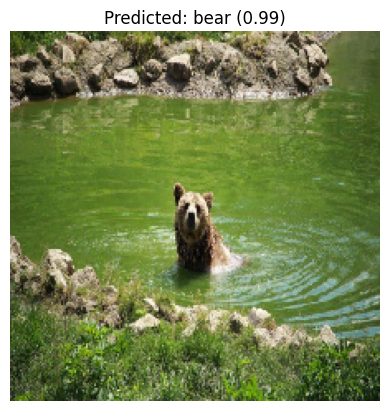

In [ ]:
class_names = train_data.class_names

print("Predicted class:", class_names[predicted_class])
print("Confidence:", confidence)


plt.imshow(img)
plt.title(f"Predicted: {class_names[predicted_class]} ({confidence:.2f})")
plt.axis('off')
plt.show()
